In [1]:
# Importing Libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

mean_age,mean_played_hours,mean_session_length
<dbl>,<dbl>,<dbl>
21.58537,9.313008,32.85302


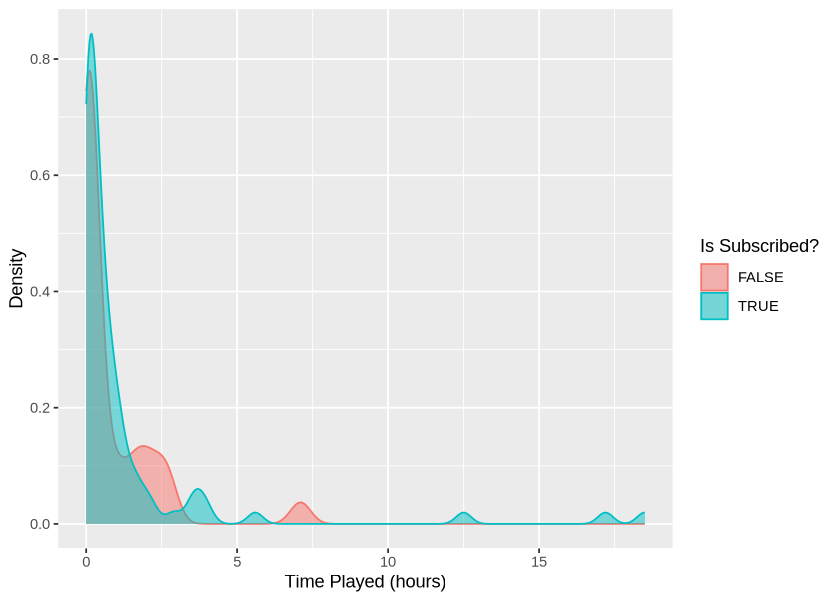

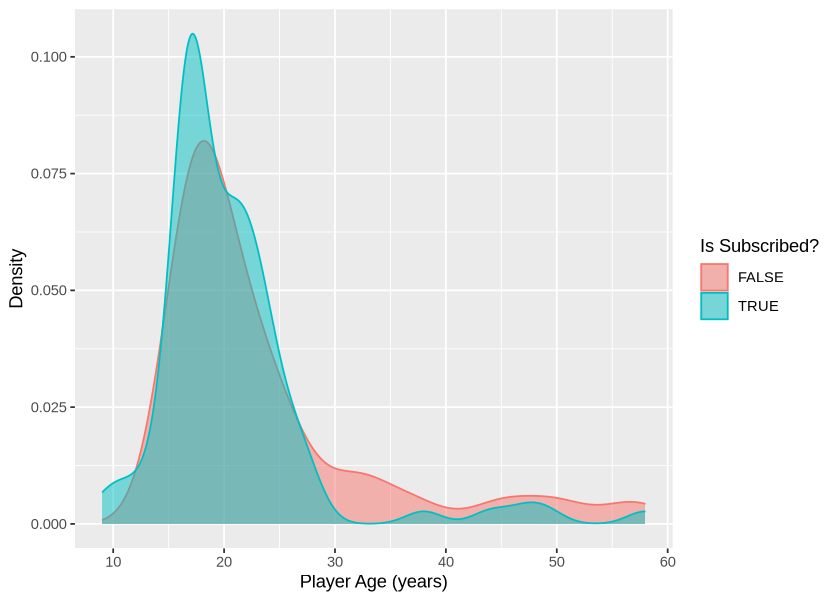

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


hashedEmail,player_average_session_length,experience,subscribe,played_hours,name,gender,Age
<chr>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.00000,Regular,TRUE,1.5,Isaac,Male,20
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.00000,Pro,FALSE,0.4,Lyra,Male,21
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.00000,Beginner,TRUE,0.1,Osiris,Male,17
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.15385,Regular,TRUE,5.6,Winslow,Male,17
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,35.00000,Pro,TRUE,1.0,Knox,Male,17
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10.00000,Veteran,FALSE,0.1,Callum,Male,19


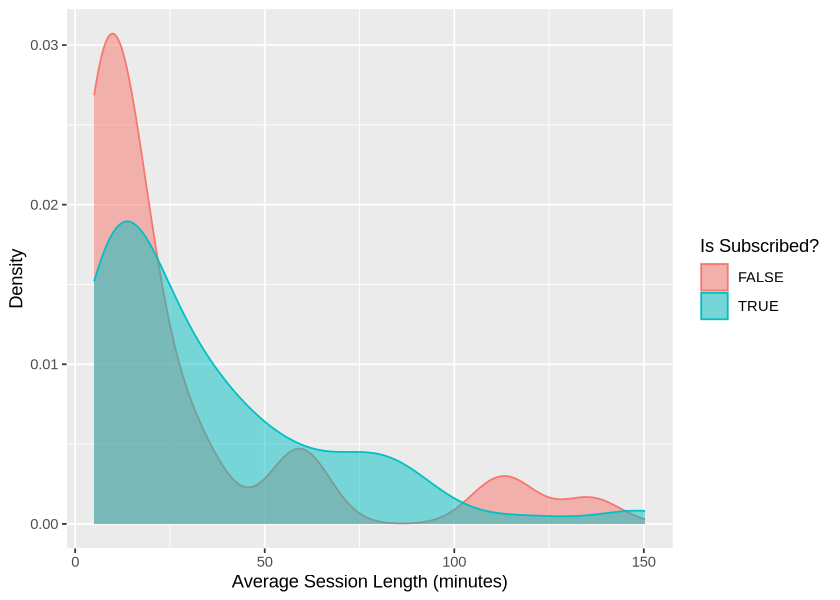

In [4]:
# Raw dataset URLs
player_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/players.csv"
sessions_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/sessions.csv"

# Reading Data (with the column specification message disabled) and Omitting NAs
player_data <- na.omit(read_csv(player_data_url, show_col_types = FALSE))
sessions_data <- na.omit(read_csv(sessions_data_url, show_col_types = FALSE))

# Wrangling Sessions Data
sessions_wrangled_data <- sessions_data |>
    mutate(session_length = as.POSIXct(end_time,format = "%d/%m/%Y %H:%M") - as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    select(hashedEmail, session_length) |>
    group_by(hashedEmail) |>
    summarize(player_average_session_length = as.numeric(mean(session_length)))

# Merging Player Data and Wrangled Sessions Data
merged_data <- left_join(sessions_wrangled_data, player_data, by = "hashedEmail") |> na.omit()

# Calculating Mean Values for all Quantitative Variables
mean_quantitative_data <- merged_data |>
    summarize(mean_age = mean(Age), mean_played_hours = mean(played_hours), mean_session_length = mean(player_average_session_length))
mean_quantitative_data

# Creating a Density Plot for Players' Total Time Played
options(repr.plot.width = 15, repr.plot.height = 5)
time_plot <- merged_data |>
    select(played_hours, subscribe) |>
    filter(played_hours >= 0, played_hours <= 20) |>
    ggplot(aes(x=played_hours, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Time Played (hours)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

# Creating a Density Plot for Players' Age
options(repr.plot.width = 7, repr.plot.height = 5)
age_plot <- merged_data |>
    select(Age, subscribe) |>
    ggplot(aes(x=Age, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Player Age (years)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

# Creating a Density Plot for Players' Average Session Length
session_length_plot <- merged_data |>
    select(player_average_session_length, subscribe) |>
    ggplot(aes(x=player_average_session_length, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Average Session Length (minutes)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

# Rendering all Plots
time_plot
age_plot
session_length_plot
#head(player_data)
head(sessions_data)
head(merged_data)

# Data Description
The original source contains two datasets named "player.csv" and "sessions.csv".
### player.csv Variables:
| Variable Name | Description | Type |
| --- | --- | --- |
| experience | Player's experience level | Character |
| subscribe | Whether or not the player is subscribed to a game-related newsletter | Logical |
| hashedEmail | Player's unique hashed email | Character |
| played_hours | Total time the player has played (hours)| Double |
| name | Player's anonymized name | Character |
| gender | Player's gender | Character |
| Age | Player's age (years) | Double |
There are 7 total variables in the "player.csv" dataset, and they were collected through the PLAICraft site when a prospective player self-reports this information before they are able to play for the first time, with the exception for the played_hours variable, which is calculated by adding up the length of all their sessions.

### sessions.csv Variables:
| Variable Name | Description | Type |
| --- | --- | --- |
| hashedEmail | Player's experience level | Character |
| start_time | Time the player's session started (DD/MM/YYYY HH:mm) | Character |
| end_time | Time the player's session ended (DD/MM/YYYY HH:mm) | Character |
| original_start_time | Time the player's session started in Unix time (ms) | Double |
| original_end_time | Time the player's session ended in Unix time (ms) | Double |
There are 5 total variables in the "sessions.csv" dataset; hashedEmail is also collected through the player information form in the PLAICraft website, and the rest of the variables are recorded along with each individual session.

The dataset being used in the project is a combination of the player dataset and the sessions dataset. Each entry is synced up from both datasets with the hashedEmail variable, as that is consistent between the two. The "start_time" and "end_time" variables are subtracted to create a 

## **Chosen Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### **Specific Question:** To what accuracy can a player's *age*, *average session length*, and *total play time* predict whether the player is subscribed to a game-related newsletter in the merged player and sessions dataset?